<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


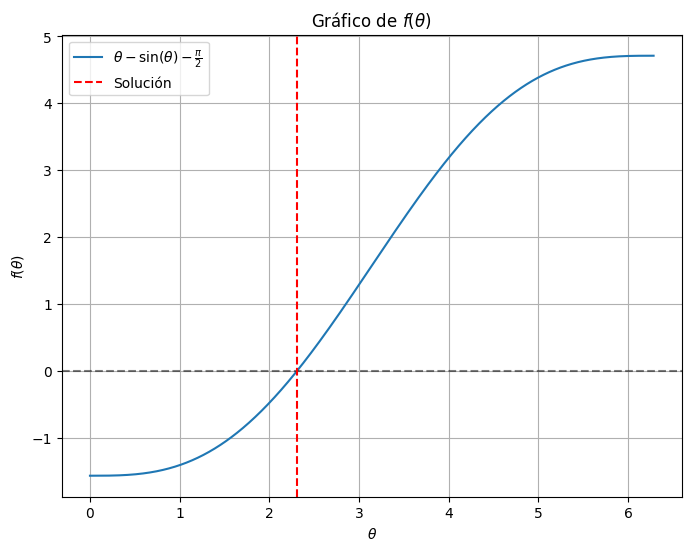

La solución para theta es aproximadamente: 2.3098822020596512


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problema 1.0
# Función para resolver la ecuación theta - sin(theta) = pi/2
def f(theta):
    return theta - np.sin(theta) - np.pi/2

# Método de bisección para encontrar la raíz de f
def bisection_method(f, a, b, tol=1e-6):
    while (b - a)/2 > tol:
        midpoint = (a + b)/2
        if f(midpoint) == 0:
            return midpoint
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
    return (a + b)/2

# Encuentra la solución usando el método de bisección
theta_solution = bisection_method(f, 0, np.pi)


theta_values = np.linspace(0, 2*np.pi, 1000)
df = pd.DataFrame({'Theta': theta_values, 'f(Theta)': f(theta_values)})

plt.figure(figsize=(8, 6))
plt.plot(df['Theta'], df['f(Theta)'], label=r'$\theta - \sin(\theta) - \frac{\pi}{2}$')
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.axvline(theta_solution, color='r', linestyle='--', label='Solución')
plt.title('Gráfico de $f(\\theta)$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.legend()
plt.grid(True)
plt.show()

print("La solución para theta es aproximadamente:", theta_solution)



Tiempo aproximado usando el método de Bisección: 4.7314453125 segundos
Tiempo aproximado usando el método de Punto Fijo: 10.0 segundos
Tiempo aproximado usando el método de Newton: 2.0031144463862107 segundos
Tiempo aproximado usando el método de Secante: 4.736139454903119 segundos


In [39]:
import numpy as np
from scipy import optimize

# Constantes
g = 32.17  # ft/s^2
k = 0.1    # lbs/ft
s0 = 300   # ft
m = 0.25   # lb

# Define la función s(t)
def s(t):
    """
    Función de posición en función del tiempo.
    """
    return s0 - (m*g*t)/k + (((m**2)*g*t)*(1-np.exp((-k*t)/m)))/k

# Método de Bisección
def bisection_method(a, b, tol=0.01):
    """
    Método de bisección para encontrar raíces de funciones.
    """
    while abs(b - a) > tol:
        c = (a + b) / 2
        if s(a) * s(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Método de Punto Fijo usando optimize.fixed_point
def point_fixed_method(t0):
    """
    Método de punto fijo para encontrar raíces de funciones usando optimize.fixed_point.
    """
    return optimize.fixed_point(s, t0,)

# Método de Newton
def newton_method(t0):
    """
    Método de Newton para encontrar raíces de funciones usando optimize.newton.
    """
    return optimize.newton(s, t0)

# Método de Secante
def secant_method(t0, t1, tol=0.01):
    """
    Método de la secante para encontrar raíces de funciones.
    """
    while abs(t1 - t0) > tol:
        t2 = t1 - s(t1) * (t1 - t0) / (s(t1) - s(t0))
        t0, t1 = t1, t2
    return t1

# Calcula el tiempo aproximado usando cada método
bisection_result = bisection_method(0, 10)
point_fixed_result = point_fixed_method(4.776)
newton_result = newton_method(4.776)
secant_result = secant_method(4, 6)

# Imprime los resultados
print(f"Tiempo aproximado usando el método de Bisección: {bisection_result} segundos")
print(f"Tiempo aproximado usando el método de Punto Fijo: {point_fixed_result} segundos")
print(f"Tiempo aproximado usando el método de Newton: {newton_result} segundos")
print(f"Tiempo aproximado usando el método de Secante: {secant_result} segundos")


Tiempo aproximado usando el método de Bisección: 4.7314453125 segundos
Tiempo aproximado usando el método de Punto Fijo: 4.655344782952531 segundos
Tiempo aproximado usando el método de Newton: 4.736139137603488 segundos
Tiempo aproximado usando el método de Secante: 4.736139454903118 segundos


a. Magnetización reducida (optimize.newton): 0.9575
b. Magnetización reducida (método de punto fijo): 0.9575


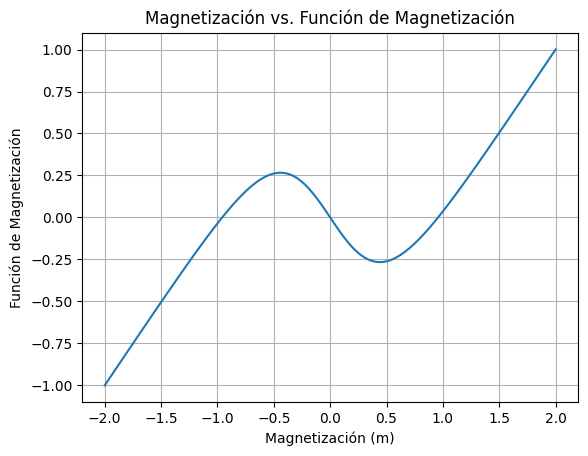

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Función para la ecuación de magnetización reducida
def magnetization_eq(m, T):
    return np.tanh(m / T) - m

# a. Encontrar la magnetización reducida para T = 0.5 utilizando optimize.newton
T = 0.5
m_initial_guess = 1  # Supongamos un valor inicial
m_reduced_newton = optimize.newton(lambda m: magnetization_eq(m, T), m_initial_guess)
print("a. Magnetización reducida (optimize.newton):", round(m_reduced_newton, 4))

# Método de punto fijo para validar la solución
def fixed_point_iteration(g, x0, tol=1e-4, max_iter=100):
    """
    Encuentra un punto fijo de la función g utilizando el método de iteración de punto fijo.

    Parámetros:
        g: La función cuyo punto fijo se busca.
        x0: Valor inicial para la iteración.
        tol: Tolerancia para la convergencia.
        max_iter: Número máximo de iteraciones permitidas.

    Devuelve:
        x: La aproximación del punto fijo.
    """
    for i in range(max_iter):
        x = g(x0)
        if abs(x - x0) < tol:
            return x
        x0 = x
    print("El método de iteración de punto fijo no convergió después de", max_iter, "iteraciones.")
    return None


m_reduced_fixed_point = fixed_point_iteration(lambda m: np.tanh(m / T), m_initial_guess)
print("b. Magnetización reducida (método de punto fijo):", round(m_reduced_fixed_point, 4))


def mag(m):
    return m - np.tanh(m/T)

m_values = np.linspace(-2, 2, 100)
plt.plot(m_values, mag(m_values))
plt.xlabel('Magnetización (m)')
plt.ylabel('Función de Magnetización')
plt.title('Magnetización vs. Función de Magnetización')
plt.grid(True)
plt.show()


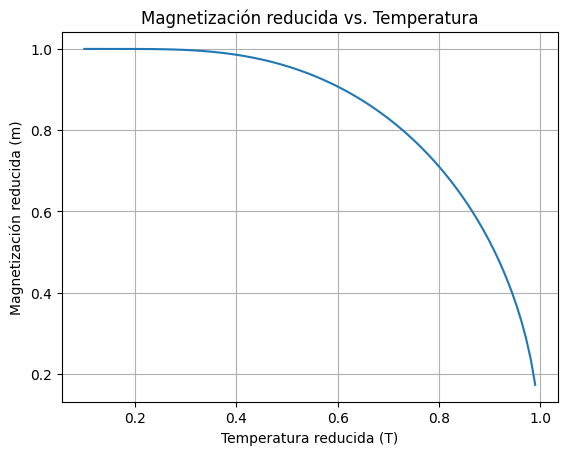

In [55]:
T_values = np.linspace(0.1, 0.99, 100)

#
m_reduced_values = []
m_initial_guess = 1

for T in T_values:
    m_reduced = secant_method(lambda m: magnetization_eq(m, T), m_initial_guess, m_initial_guess + 0.1)
    m_reduced_values.append(m_reduced)


plt.plot(T_values, m_reduced_values)
plt.xlabel('Temperatura reducida (T)')
plt.ylabel('Magnetización reducida (m)')
plt.title('Magnetización reducida vs. Temperatura')
plt.grid(True)
plt.show()

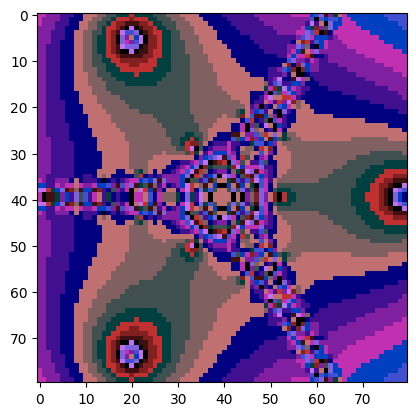

In [58]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)